<a href="https://colab.research.google.com/github/berenicehdr/SaturdaysAI_Fem/blob/master/SaturdaysAI_arima_cases_by_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> ARIMA





ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:
Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Import Libraries

In [0]:
import numpy as np
from numpy.random import seed
seed(1)

import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler


dtypes = {
        'count':                                    'float64'
                                      
        
        }

**ARIMA **

## Data Import and Manipulation

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/SaturdaysAI_Fem/data_by_week.csv', dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})
a=train_df.head()
b=train_df
c=b.sort_values(['year','nweek'], ascending=True)
c=pd.DataFrame(c)
from pandas import DataFrame  
df = DataFrame(c, columns= ['year','nweek']) 
df1 = df['year'].map(str) + df['nweek'].map(str)
df1=pd.DataFrame(df1)
df2 = DataFrame(c, columns= ['count']) 
df3=pd.concat([df1, df2], axis = 1)
df3.columns = ['FullDate', 'count']
df3=pd.concat([df1, df2], axis = 1)
df3.columns = ['FullDate', 'count']
df3.sort_values(['FullDate','count'], ascending=True)
df4 = df3.groupby('FullDate').agg(sum)
df4.sort_values(['FullDate'], ascending=True)
tseries=df4['count']
tseries

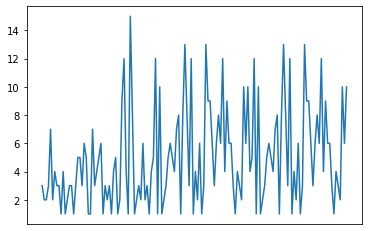

In [7]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [0]:
df=pd.DataFrame(tseries)
df

## Train-Test Split

In [0]:
#
tseriesr=pd.Series(tseries)
type(tseriesr)

# logvalue=np.log(tseriesr)
train, val = tseriesr[1:79], tseriesr[80:99]

In [0]:
train

In [0]:
val

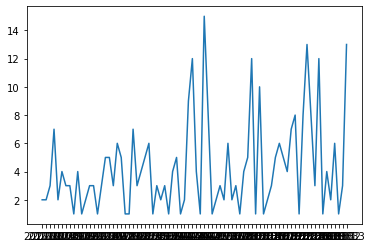

In [13]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as ts

plt.plot(train)
plt.show()

### Autocorrelation Plot

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


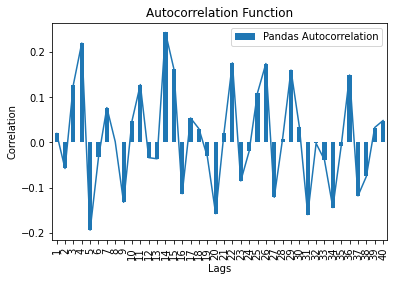

In [14]:
acf_1 =  acf(train)[1:50]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.plot(acf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Autocorrelation Function')
plt.show()

In [15]:
acf_1

array([ 0.01959354, -0.05780268,  0.12744408,  0.21940366, -0.19408527,
       -0.03334182,  0.07676948,  0.00151052, -0.13256842,  0.0471094 ,
        0.1276602 , -0.03378178, -0.03637367,  0.24276231,  0.16283749,
       -0.11347505,  0.05380061,  0.03004677, -0.03109418, -0.15764754,
        0.02154865,  0.17560938, -0.08529076, -0.01964062,  0.10937495,
        0.17418222, -0.12142593,  0.00846262,  0.15966363,  0.03413375,
       -0.15966826, -0.00226617, -0.03890381, -0.14414471, -0.00754334,
        0.14883527, -0.11829605, -0.0754635 ,  0.03275135,  0.04822087])

### Partial Autocorrelation Plot

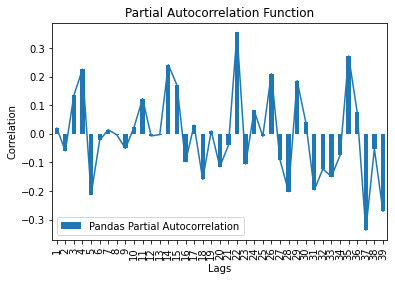

In [17]:
pacf_1 =  pacf(train)[1:40]
val_df = pd.DataFrame([pacf_1]).T
val_df.columns = ['Pandas Partial Autocorrelation']
val_df.index += 1
val_df.plot(kind='bar')
plt.plot(pacf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Partial Autocorrelation Function')
plt.show()

In [0]:
pacf_1

### Dickey-Fuller Test

In [0]:
result = ts.adfuller(train)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

## ARIMA Model Configuration

In [20]:
# https://www.kdnuggets.com/2018/02/google-colab-free-gpu-tutorial-tensorflow-keras-pytorch.html/2
# https://pypi.org/project/pyramid-arima/
!pip install -q pyramid-arima==0.9.0

     |████████████████████████████████| 604kB 4.9MB/s 


In [21]:
from pyramid.arima import auto_arima
Arima_model=auto_arima(train, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=52, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=169.060, BIC=171.497, Fit time=0.252 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); data is likel

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=164.570, BIC=168.227, Fit time=0.428 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=156.378, BIC=161.254, Fit time=3.585 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=158.784, BIC=166.098, Fit time=2.135 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=154.718, BIC=158.374, Fit time=1.834 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=156.261, BIC=161.136, Fit time=2.855 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=158.226, BIC=164.320, Fit time=4.437 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 15.562 seconds


/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Arima(p,q,d)
*p representa el orden de la parte autorregresiva de la serie estacionaria.
 q representa el orden de la media móvil de la serie estacionaria.
 d representa el número de diferencias que ha habido que tomar para que la serie que,
inicialmente no era estacionaria, sea finalmente estacionaria. 

In [0]:
Arima_model.summary()

In [0]:
#para los 19 del validation set
prediction=pd.DataFrame(Arima_model.predict(n_periods=19), index=val.index)
prediction.columns = ['Predicted_cases']
predictions=prediction['Predicted_cases']

In [0]:
prediction

In [0]:
val

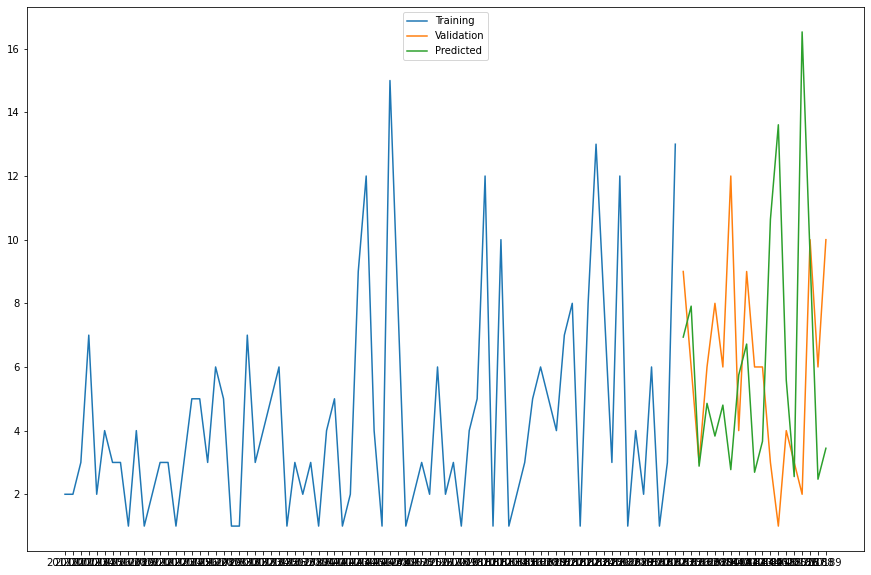

In [26]:
plt.figure(figsize=(15,10))
plt.plot(train, label='Training')
plt.plot(val, label='Validation')
#PREDICTION WHAT?
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper center')
plt.show()

In [0]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [0]:
type(predictions)

In [28]:
mda(val, predictions)

0.8947368421052632

In [29]:
import math
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(val, predictions)
rmse = math.sqrt(mse)
print('RMSE  val pred : %f' % rmse)

RMSE  val pred : 5.733434


In [0]:
rmsevalLSTM = 4.13
#Validation Score: 4.13 RMSE

## Validate Predictions on Test Data

In [31]:
test = np.array([[4,4,2,6,4,2,10,6,10,5,12,1,10,1,2,3,5,6,5]])
test.shape



(1, 19)

In [32]:
test=test.reshape(-1)
test

array([ 4,  4,  2,  6,  4,  2, 10,  6, 10,  5, 12,  1, 10,  1,  2,  3,  5,
        6,  5])

In [33]:
test.shape

(19,)

In [0]:
test = pd.Series(test)

In [0]:
predictionnew=pd.DataFrame(Arima_model.predict(n_periods=19), index=test.index)
predictionnew.columns = ['Unseen_Predicted_Cases']
predictionsnew=predictionnew['Unseen_Predicted_Cases']

In [0]:
rmseTestLSTM=  3.843527

In [37]:
mse_new = mean_squared_error(test, predictionsnew)
rmse_new = math.sqrt(mse_new)
print('RMSE test unseen: %f' % rmse_new)

RMSE test unseen: 5.216746


In [0]:
forecast_error_new = (predictionsnew-test)
forecast_error_new

In [39]:
mean_forecast_error_new = np.mean(forecast_error_new)
mean_forecast_error_new

1.0079359608516878

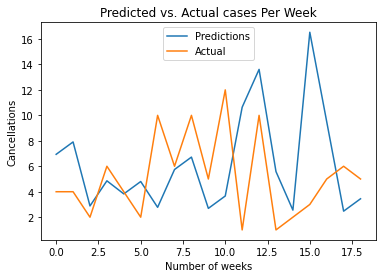

In [40]:
predictons, =plt.plot(predictionsnew, label='Predictions')
actual, =plt.plot(test, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual cases Per Week")
plt.legend(loc = 'upper center')
plt.show()

Referencias:
https://towardsdatascience.com/predicting-hotel-cancellations-with-extratreesclassifier-and-logistic-regression-fb9229a95d1e